In [1]:
# importing required packages
import numpy as np
import pandas as pd

In [2]:
# loading the train and test sets:
instagram_train = pd.read_csv("data/train.csv")
instagram_test = pd.read_csv("data/test.csv")

In [3]:
# Checking the first few rows:
instagram_train.info()
instagram_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile_pic           576 non-null    int64  
 1   nums_length_username  576 non-null    float64
 2   fullname_words        576 non-null    int64  
 3   nums_length_fullname  576 non-null    float64
 4   name_is_username      576 non-null    int64  
 5   description_length    576 non-null    int64  
 6   external_URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   posts                 576 non-null    int64  
 9   followers             576 non-null    int64  
 10  following             576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


,profile_pic,nums_length_username,fullname_words,nums_length_fullname,name_is_username,description_length,external_URL,private,posts,followers,following,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
# Baseline model: always predicts the majority:
number_real = np.sum(instagram_train['fake'] == 0)
number_fake = np.sum(instagram_train['fake'] == 1)

print('Real Accounts:', number_real, 'Fake Accounts:', number_fake)

Real Accounts: 288 Fake Accounts: 288


In [5]:
import statsmodels.formula.api as smf

logreg0 = smf.logit(formula = 'fake ~ profile_pic + name_is_username + description_length + followers + following + posts',
                   data = instagram_train).fit()

print(logreg0.summary())

Optimization terminated successfully.
         Current function value: 0.270439
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:                  576
Model:                          Logit   Df Residuals:                      569
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.6098
Time:                        16:21:35   Log-Likelihood:                -155.77
converged:                       True   LL-Null:                       -399.25
Covariance Type:            nonrobust   LLR p-value:                5.415e-102
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.8796      1.842      3.735      0.000       3.269      10.490
prof

/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [6]:
y_test = instagram_test['fake']

y_prob0 = logreg0.predict(instagram_test)
y_pred0 = pd.Series([1 if x > 0.5 else 0 for x in y_prob0], index=y_prob0.index)

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred0).ravel()
print ("Confusion Matrix : \n", cm)
print("Accuracy:" )# Accuracy:
(cm[0]+cm[3])/sum(cm)

Confusion Matrix : 
 [53  7  4 56]
Accuracy:


0.9083333333333333

In [8]:
# removed name_is_username for high p value
logreg1 = smf.logit(formula = 'fake ~ profile_pic + description_length + followers + following + posts',
                   data = instagram_train).fit()

print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.272979
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:                  576
Model:                          Logit   Df Residuals:                      570
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.6062
Time:                        16:21:36   Log-Likelihood:                -157.24
converged:                       True   LL-Null:                       -399.25
Covariance Type:            nonrobust   LLR p-value:                2.230e-102
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.0303      1.899      3.701      0.000       3.308      10.753
prof

/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [9]:
y_test = instagram_test['fake']

y_prob1 = logreg1.predict(instagram_test)
y_pred1 = pd.Series([1 if x > 0.5 else 0 for x in y_prob1], index=y_prob1.index)

In [10]:
cm1 = confusion_matrix(y_test, y_pred1).ravel()
print ("Confusion Matrix : \n", cm1)
print("Accuracy:" )# Accuracy:
(cm1[0]+cm1[3])/sum(cm1)

Confusion Matrix : 
 [54  6  5 55]
Accuracy:


0.9083333333333333

In [11]:
# Checking my own account!
louis_account = pd.DataFrame(data = {'profile_pic' : [1], 'description_length' : [100], 'followers' : [700],
                               'following' : [900], 'posts' : [40], 'name_is_username': 0})

print("Probability That Louis's Account is Fake according to model 0:")
logreg0.predict(louis_account)

Probability That Louis's Account is Fake according to model 0:


0    0.054586
dtype: float64

In [12]:
print("Probability That Louis's Account is Fake according to model 1:")
logreg1.predict(louis_account)

Probability That Louis's Account is Fake according to model 1:


0    0.056007
dtype: float64

In [13]:
# profile_picture has a huge coefficient, what happens to the accuracy if we remove it?

# removed name_is_username for high p value + profile_pic for experiment
logreg2 = smf.logit(formula = 'fake ~ + description_length + followers + following + posts',
                   data = instagram_train).fit()

print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.353122
         Iterations 18
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:                  576
Model:                          Logit   Df Residuals:                      571
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.4906
Time:                        16:21:36   Log-Likelihood:                -203.40
converged:                       True   LL-Null:                       -399.25
Covariance Type:            nonrobust   LLR p-value:                 1.720e-83
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.8048      0.165     10.919      0.000       1.481       2.129
desc

/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [14]:
y_test = instagram_test['fake']

y_prob2 = logreg2.predict(instagram_test)
y_pred2 = pd.Series([1 if x > 0.5 else 0 for x in y_prob2], index=y_prob2.index)

In [15]:
cm2 = confusion_matrix(y_test, y_pred2).ravel()
print ("Confusion Matrix : \n", cm2)
print("Accuracy:" )# Accuracy:
(cm2[0]+cm2[3])/sum(cm2)

Confusion Matrix : 
 [43 17  6 54]
Accuracy:


0.8083333333333333

Removing profile picture worsens the accuracy on the test set by about 10%.
Let's now try to do the opposite, and regularize the model to see if some of the coefficients converge to 0:

In [16]:
### profile_picture has a huge coefficient, what happens to the accuracy if we remove it?

logreg3 = smf.logit(formula = 'fake ~ + profile_pic + description_length + posts',
                   data = instagram_train).fit()

print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.320691
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:                  576
Model:                          Logit   Df Residuals:                      572
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.5373
Time:                        16:21:36   Log-Likelihood:                -184.72
converged:                       True   LL-Null:                       -399.25
Covariance Type:            nonrobust   LLR p-value:                 1.117e-92
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.6913      0.724      6.476      0.000       3.272       6.111
prof

In [17]:
y_test = instagram_test['fake']

y_prob3 = logreg3.predict(instagram_test)
y_pred3 = pd.Series([1 if x > 0.5 else 0 for x in y_prob3], index=y_prob3.index)

In [18]:
cm3 = confusion_matrix(y_test, y_pred3).ravel()
print ("Confusion Matrix : \n", cm3)
print("Accuracy:" )
(cm3[0]+cm3[3])/sum(cm3)

Confusion Matrix : 
 [48 12  5 55]
Accuracy:


0.8583333333333333

Accuracy drops by 5% when dropping the lowest two coefficients, followers and following. Let's see what happens when profile picture ONLY is used:

In [19]:
# removed everything but profile pic
logreg4 = smf.logit(formula = 'fake ~ + profile_pic',
                   data = instagram_train).fit()

print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.442559
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:                  576
Model:                          Logit   Df Residuals:                      574
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.3615
Time:                        16:21:36   Log-Likelihood:                -254.91
converged:                       True   LL-Null:                       -399.25
Covariance Type:            nonrobust   LLR p-value:                 9.656e-65
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.4427      0.711      6.246      0.000       3.049       5.837
profile_pic    -5.3280    

In [20]:
# removed everything but profile pic
logreg4 = smf.logit(formula = 'fake ~ + profile_pic',
                   data = instagram_train).fit()

print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.442559
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:                  576
Model:                          Logit   Df Residuals:                      574
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.3615
Time:                        16:21:36   Log-Likelihood:                -254.91
converged:                       True   LL-Null:                       -399.25
Covariance Type:            nonrobust   LLR p-value:                 9.656e-65
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.4427      0.711      6.246      0.000       3.049       5.837
profile_pic    -5.3280    

In [21]:
y_test = instagram_test['fake']

y_prob4 = logreg4.predict(instagram_test)
y_pred4 = pd.Series([1 if x > 0.5 else 0 for x in y_prob4], index=y_prob4.index)

In [22]:
cm4 = confusion_matrix(y_test, y_pred4).ravel()
print ("Confusion Matrix : \n", cm4)
print("Accuracy:" )
(cm4[0]+cm4[3])/sum(cm4)

Confusion Matrix : 
 [60  0 31 29]
Accuracy:


0.7416666666666667

The accuracy with profile picture only is worst. So they will likely think that someone without a profile picture is a bit. This is likely due to biased bot training data. In reality, advanced bots do have profile pictures so we would likely need to collect data of more advanced bots. At least adding other features greatly improves our model to 91%.

In [23]:
# Is the RATIO relevant? Let's add a new column, turn infinity to a large number
instagram_train2 = instagram_train.copy()
instagram_train2["following_follow_ratio"] = instagram_train2["following"] / instagram_train2["followers"]
instagram_train2.loc[instagram_train2['following_follow_ratio'] == np.inf, 'following_follow_ratio'] = 100000

instagram_test2 = instagram_test.copy()
instagram_test2["following_follow_ratio"] = instagram_test2["following"] / instagram_test2["followers"]
instagram_test2.loc[instagram_test2['following_follow_ratio'] == np.inf, 'following_follow_ratio'] = 100000

In [24]:
# Model with highest accuracy + the new 'ratio' column
logreg5 = smf.logit(formula = 'fake ~ profile_pic + description_length + followers + following + posts + following_follow_ratio',
                   data = instagram_train2).fit()

print(logreg5.summary())

Optimization terminated successfully.
         Current function value: 0.228487
         Iterations 18
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:                  573
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.6704
Time:                        16:21:36   Log-Likelihood:                -130.92
converged:                       True   LL-Null:                       -397.17
Covariance Type:            nonrobust   LLR p-value:                8.417e-112
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.2174      0.967      4.361      0.000       2.322     

/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [25]:
y_test = instagram_test2['fake']

y_prob5 = logreg5.predict(instagram_test2)
y_pred5 = pd.Series([1 if x > 0.5 else 0 for x in y_prob5], index=y_prob5.index)

In [26]:
cm5 = confusion_matrix(y_test, y_pred5).ravel()
print ("Confusion Matrix : \n", cm5)
print("Accuracy:" )
(cm5[0]+cm5[3])/sum(cm5)

Confusion Matrix : 
 [56  4 10 50]
Accuracy:


0.8833333333333333

In [27]:
# Checking VIF of those new columns:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# define a function to compute VIFs:
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values  
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index=columns)

In [28]:
cols = ['followers', 'following', 'following_follow_ratio', 'profile_pic', 'description_length', 'posts']
instagram_train2 = instagram_train2.dropna()
VIF(instagram_train2, cols)

/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


followers                 1.119660
following                 1.074109
following_follow_ratio    1.027116
profile_pic               1.209544
description_length        1.199180
posts                     1.160064
dtype: float64

In [29]:
# trying regularization
logreg6 = smf.logit(formula = 'fake ~ profile_pic + description_length + followers + following + posts',
                   data = instagram_train).fit_regularized(L1_wt=0.001)

print(logreg6.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27297924675976243
            Iterations: 43
            Function evaluations: 67
            Gradient evaluations: 43
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:                  576
Model:                          Logit   Df Residuals:                      570
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.6062
Time:                        16:21:37   Log-Likelihood:                -157.24
converged:                       True   LL-Null:                       -399.25
Covariance Type:            nonrobust   LLR p-value:                2.230e-102
                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/louisbemberg/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [30]:
y_test = instagram_test['fake']

y_prob6 = logreg6.predict(instagram_test)
y_pred6 = pd.Series([1 if x > 0.5 else 0 for x in y_prob6], index=y_prob6.index)

In [31]:
cm6 = confusion_matrix(y_test, y_pred6).ravel()
print ("Confusion Matrix : \n", cm6)
print("Accuracy:" )
(cm6[0]+cm6[3])/sum(cm6)

Confusion Matrix : 
 [54  6  5 55]
Accuracy:


0.9083333333333333

## Re-writing the model in Scikit-learn

In [32]:
from sklearn.linear_model import LogisticRegression

y_train = instagram_train['fake']
x_train = instagram_train[['profile_pic', 'description_length', 'followers', 'following', 'posts']]

y_test = instagram_test['fake']
x_test = instagram_test[['profile_pic', 'description_length', 'followers', 'following', 'posts']]

In [33]:
x_train

,profile_pic,description_length,followers,following,posts
0,1,53,1000,955,32
1,1,44,2740,533,286
2,1,0,159,98,13
3,1,82,414,651,679
4,1,0,151,126,6
...,...,...,...,...,...
571,1,0,166,596,33
572,1,21,66,75,44
573,1,0,96,339,4
574,1,11,57,73,0


In [34]:
logistic_regression = LogisticRegression(C=1)
logistic_regression.fit(x_train, y_train)
logistic_regression.coef_
print(list(zip(logistic_regression.coef_[0], ['profile_pic', 'description_length', 'followers', 'following', 'posts'])))

[(-3.258129913569952, 'profile_pic'), (-0.015864234632509844, 'description_length'), (-0.0032253049656993014, 'followers'), (0.0009214683826714231, 'following'), (-0.016003568746048906, 'posts')]


In [35]:
from sklearn.metrics import accuracy_score

y_pred = logistic_regression.predict(x_test)
accuracy_score(y_test, y_pred)

0.875

## Evaluation of coefficients as C (regularization) ranges from 1 to 0

In [36]:
np.logspace(0,-5)

array([1.00000000e+00, 7.90604321e-01, 6.25055193e-01, 4.94171336e-01,
       3.90693994e-01, 3.08884360e-01, 2.44205309e-01, 1.93069773e-01,
       1.52641797e-01, 1.20679264e-01, 9.54095476e-02, 7.54312006e-02,
       5.96362332e-02, 4.71486636e-02, 3.72759372e-02, 2.94705170e-02,
       2.32995181e-02, 1.84206997e-02, 1.45634848e-02, 1.15139540e-02,
       9.10298178e-03, 7.19685673e-03, 5.68986603e-03, 4.49843267e-03,
       3.55648031e-03, 2.81176870e-03, 2.22299648e-03, 1.75751062e-03,
       1.38949549e-03, 1.09854114e-03, 8.68511374e-04, 6.86648845e-04,
       5.42867544e-04, 4.29193426e-04, 3.39322177e-04, 2.68269580e-04,
       2.12095089e-04, 1.67683294e-04, 1.32571137e-04, 1.04811313e-04,
       8.28642773e-05, 6.55128557e-05, 5.17947468e-05, 4.09491506e-05,
       3.23745754e-05, 2.55954792e-05, 2.02358965e-05, 1.59985872e-05,
       1.26485522e-05, 1.00000000e-05])

In [37]:
# c_ranges = np.linspace(1,0.01,100)
c_ranges = np.logspace(-5,-2)
profile_pic_coefs = []
description_length_coefs = []
followers_coefs = []
posts_coefs = []
following_coefs = []
for c in c_ranges:
    logistic_regression2 = LogisticRegression(C=c, penalty="l1", solver="liblinear")
    logistic_regression2.fit(x_train, y_train)
    coefs = logistic_regression2.coef_[0]
    profile_pic_coefs.append(coefs[0])
    description_length_coefs.append(coefs[1])
    followers_coefs.append(coefs[2])
    posts_coefs.append(coefs[3])
    following_coefs.append(coefs[4])

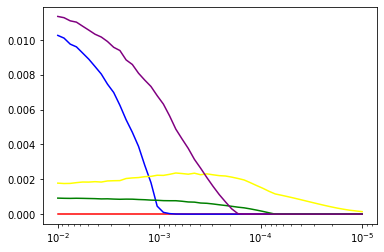

In [57]:
import matplotlib.pyplot as plt

x = c_ranges
y1 = profile_pic_coefs
y2 = description_length_coefs
y3 = followers_coefs
y4 = posts_coefs
y5 = following_coefs

fig, ax = plt.subplots()
plt.semilogx(x, np.abs(y1), c='red')
plt.semilogx(x, np.abs(y2), c='blue')
plt.semilogx(x, np.abs(y3), c='yellow')
plt.semilogx(x, np.abs(y4), c='green')
plt.semilogx(x, np.abs(y5), c='purple')

ax.invert_xaxis()
plt.show()

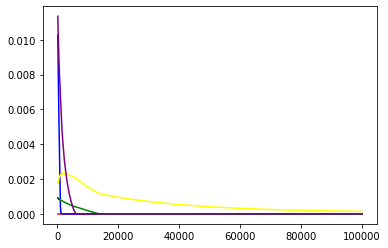

In [39]:
import matplotlib.pyplot as plt

x = [1/c for c in c_ranges]
y1 = profile_pic_coefs
y2 = description_length_coefs
y3 = followers_coefs
y4 = posts_coefs
y5 = following_coefs

plt.plot(x, np.abs(y1), c='red')
plt.plot(x, np.abs(y2), c='blue')
plt.plot(x, np.abs(y3), c='yellow')
plt.plot(x, np.abs(y4), c='green')
plt.plot(x, np.abs(y5), c='purple')
plt.show()

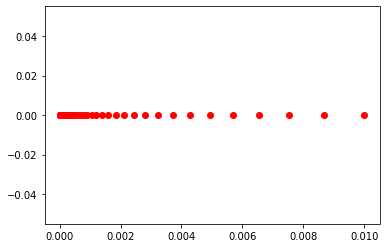

In [40]:
x = c_ranges
y1 = profile_pic_coefs

plt.scatter(x, y1, c='red')

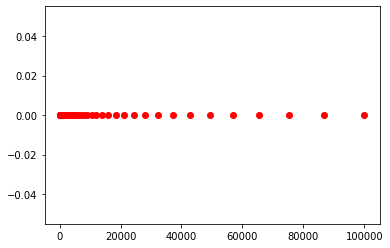

In [41]:
x = [1/c for c in c_ranges]
y1 = profile_pic_coefs

plt.scatter(x, y1, c='red')

## Support Vector Machines

In [42]:
from sklearn import svm

linear_svm = svm.SVC(kernel='linear')

In [43]:
linear_svm = linear_svm.fit(x_train, y_train)

In [44]:
linear_svm_pred = linear_svm.predict(x_test)

In [45]:
accuracy_score(y_test, linear_svm_pred)

0.8333333333333334

## Standardization of Data to improve SVM

In [46]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

# Incorrect way, scaling each set with their own mean and standard deviation
x_train_standardized = standard_scaler.fit_transform(x_train)
x_train_standardized = pd.DataFrame(x_train_standardized)

x_test_standardized = standard_scaler.fit_transform(x_test)
x_test_standardized = pd.DataFrame(x_test_standardized)


x_train_standardized

,0,1,2,3,4
0,0.65249,0.806385,-0.092711,0.486945,-0.187932
1,0.65249,0.567470,-0.090797,0.026841,0.444404
2,0.65249,-0.600561,-0.093636,-0.447437,-0.235233
3,0.65249,1.576224,-0.093355,0.155496,1.422782
4,0.65249,-0.600561,-0.093644,-0.416909,-0.252659
...,...,...,...,...,...
571,0.65249,-0.600561,-0.093628,0.095529,-0.185443
572,0.65249,-0.043091,-0.093738,-0.472514,-0.158058
573,0.65249,-0.600561,-0.093705,-0.184676,-0.257638
574,0.65249,-0.308553,-0.093748,-0.474694,-0.267597


In [47]:
linear_svm2 = svm.SVC(kernel='linear')
linear_svm_2 = linear_svm2.fit(x_train_standardized, y_train)

In [48]:
linear_svm2_pred = linear_svm2.predict(x_test_standardized)
accuracy_score(y_test, linear_svm2_pred)

0.8333333333333334

## Standardize the test set based on mean and sigma of training set

In [49]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('svc', svm.SVC(kernel='linear'))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(x_train, y_train)

pipe.score(x_test, y_test)

0.7333333333333333

In [50]:
# Correct way, standardize everything from the training's mean and stdev
# x_test_standardized2 = (df-df.mean())/df.std()
x_test_standardized2 = (x_test-x_train.mean())/x_train.std()

x_test_standardized2

,profile_pic,description_length,followers,following,posts
0,0.651923,0.195654,-0.093193,0.104161,-0.180307
1,0.651923,1.097439,-0.093690,-0.547268,-0.259902
2,0.651923,1.574855,-0.093369,0.173879,0.526100
3,0.651923,3.192764,-0.077369,7.473593,0.411682
4,0.651923,1.415716,-0.093482,-0.165997,-0.252440
...,...,...,...,...,...
115,0.651923,-0.600039,-0.093604,0.329656,-0.235029
116,0.651923,-0.600039,-0.093564,-0.375151,-0.257415
117,0.651923,-0.600039,-0.092814,3.337343,-0.259902
118,-1.531261,-0.600039,-0.093488,1.292639,-0.264877


In [51]:
linear_svm3 = svm.SVC(kernel='linear')
linear_svm_3 = linear_svm3.fit(x_train_standardized, y_train)

In [52]:
linear_svm3_pred = linear_svm3.predict(x_test_standardized2)
accuracy_score(y_test, linear_svm3_pred)

0.7333333333333333

## Trying other kernels now that the data is  standardized

In [53]:
linear_svm4 = svm.SVC(kernel='sigmoid')
linear_svm_4 = linear_svm4.fit(x_train_standardized, y_train)

In [54]:
linear_svm4_pred = linear_svm4.predict(x_test_standardized2)
accuracy_score(y_test, linear_svm4_pred)

0.775

In [55]:
linear_svm5 = svm.SVC(kernel='poly')
linear_svm_5 = linear_svm5.fit(x_train_standardized, y_train)

In [56]:
linear_svm5_pred = linear_svm5.predict(x_test_standardized2)
accuracy_score(y_test, linear_svm5_pred)

0.7583333333333333

In [59]:
linear_svm6 = svm.SVC(kernel='linear')
linear_svm_6 = linear_svm6.fit(x_train_standardized, y_train)

In [60]:
linear_svm6_pred = linear_svm6.predict(x_test_standardized2)
accuracy_score(y_test, linear_svm6_pred)

0.7333333333333333